In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correct path using double backslashes
df = pd.read_excel("C:\\Users\\LENOVO\\python datascience basics (hydrabad ds)\\ASSIGNMENT DATA SCIENCE\\Decision Tree\\heart_disease.xlsx",sheet_name=1)
df.head()

# For demonstration, use UCI-style dataset from sklearn or read from GitHub if needed
#df = pd.read_csv("C:\\Users\\LENOVO\\python datascience basics (hydrabad ds)\\ASSIGNMENT DATA SCIENCE\\Decision Tree.csv")
#df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int32  
 2   cp        908 non-null    int32  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    int32  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int32(3), int64(5), object(3)
memory usage: 75.5+ KB
None
              age         sex          cp    trestbps        chol     restecg  \
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000   
mean    53.791850    0.790749    0.777533  133.430617  201.48

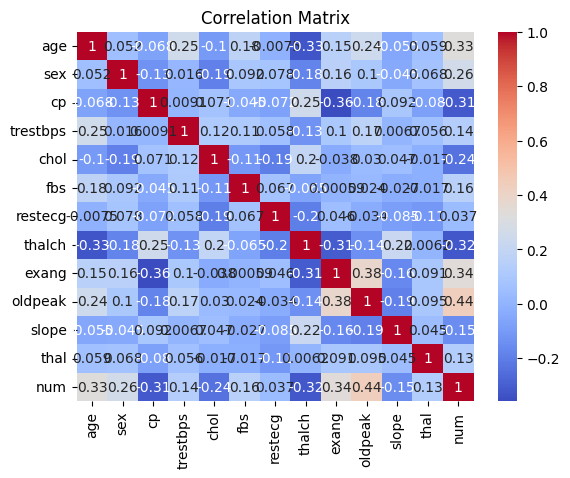

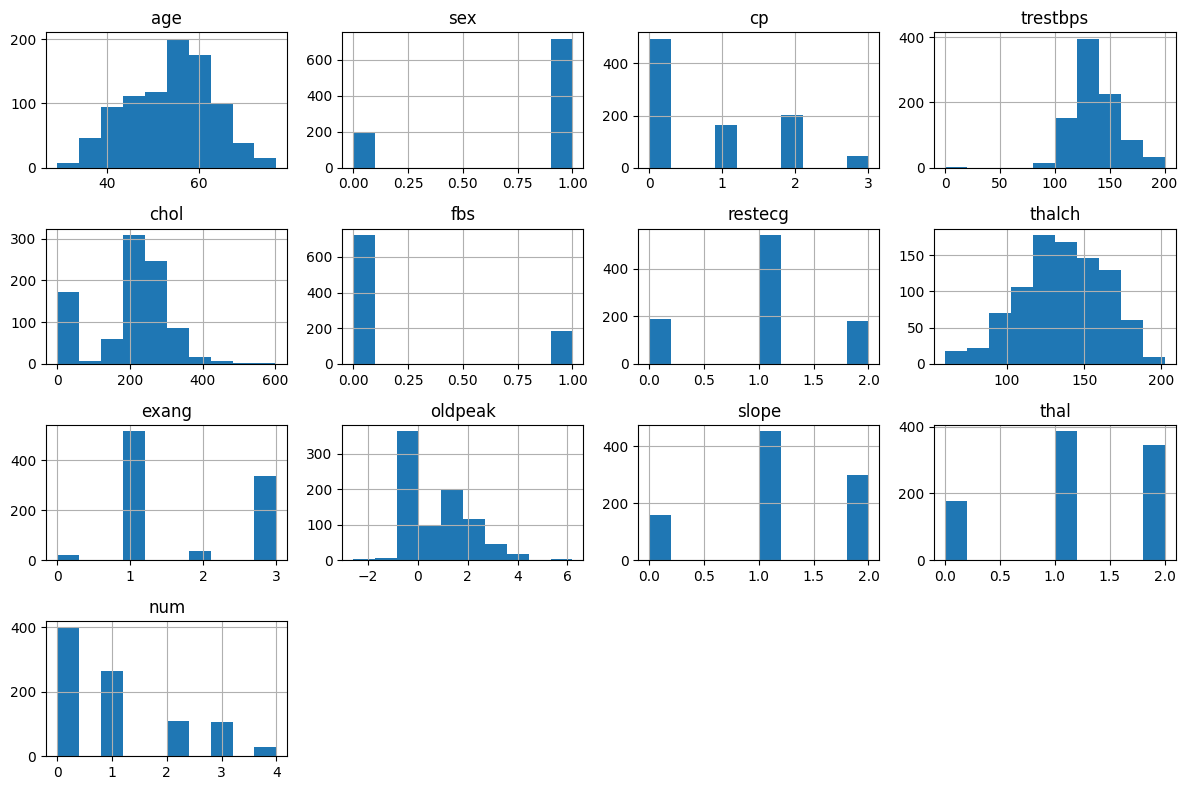

In [11]:
# Basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())
# Identify categorical columns (non-numeric)
cat_cols = df.select_dtypes(include='object').columns

# Apply Label Encoding to all categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert all object and boolean columns to string first
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        df[col] = df[col].astype(str)  # force uniform string type
        df[col] = le.fit_transform(df[col])

# Check the result
print(df.head())

# Visuals
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


In [12]:
print("Sample Encoded Data:")
print(df.head())


Sample Encoded Data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0     150      1      2.3      0   
1   41    1   1       135   203    0        1     132      1      0.0      1   
2   57    1   0       140   192    0        1     148      1      0.4      1   
3   52    1   3       118   186    0        0     190      1      0.0      1   
4   57    1   0       110   201    0        1     126      3      1.5      1   

   thal  num  
0     0    0  
1     0    0  
2     0    0  
3     0    0  
4     0    0  


In [15]:

#: Convert Multiclass 'num' to Binary Target

# 0 = No heart disease, 1-4 = Presence of heart disease
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)



In [14]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [16]:

# Label Encode Categorical Columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        df[col] = df[col].astype(str)  # convert to string
        df[col] = le.fit_transform(df[col])


In [17]:
# -------------------------------
#  Step 5: Split Data
# -------------------------------
from sklearn.model_selection import train_test_split

X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# -------------------------------
#  Step 6: Train Decision Tree
# -------------------------------
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

✅ Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        89
           1       0.78      0.82      0.80        93

    accuracy                           0.79       182
   macro avg       0.79      0.79      0.79       182
weighted avg       0.79      0.79      0.79       182



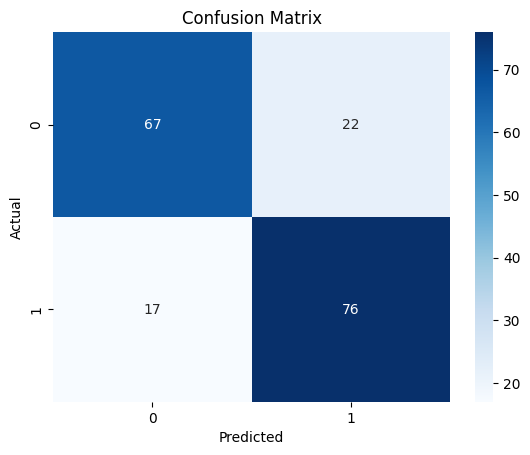

In [19]:
# -------------------------------
#  Step 7: Evaluate Model
# -------------------------------
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

print(" Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
# -------------------------------
#  Step 8: Hyperparameter Tuning
# -------------------------------
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", round(grid.best_score_, 2))


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Best CV Accuracy: 0.79


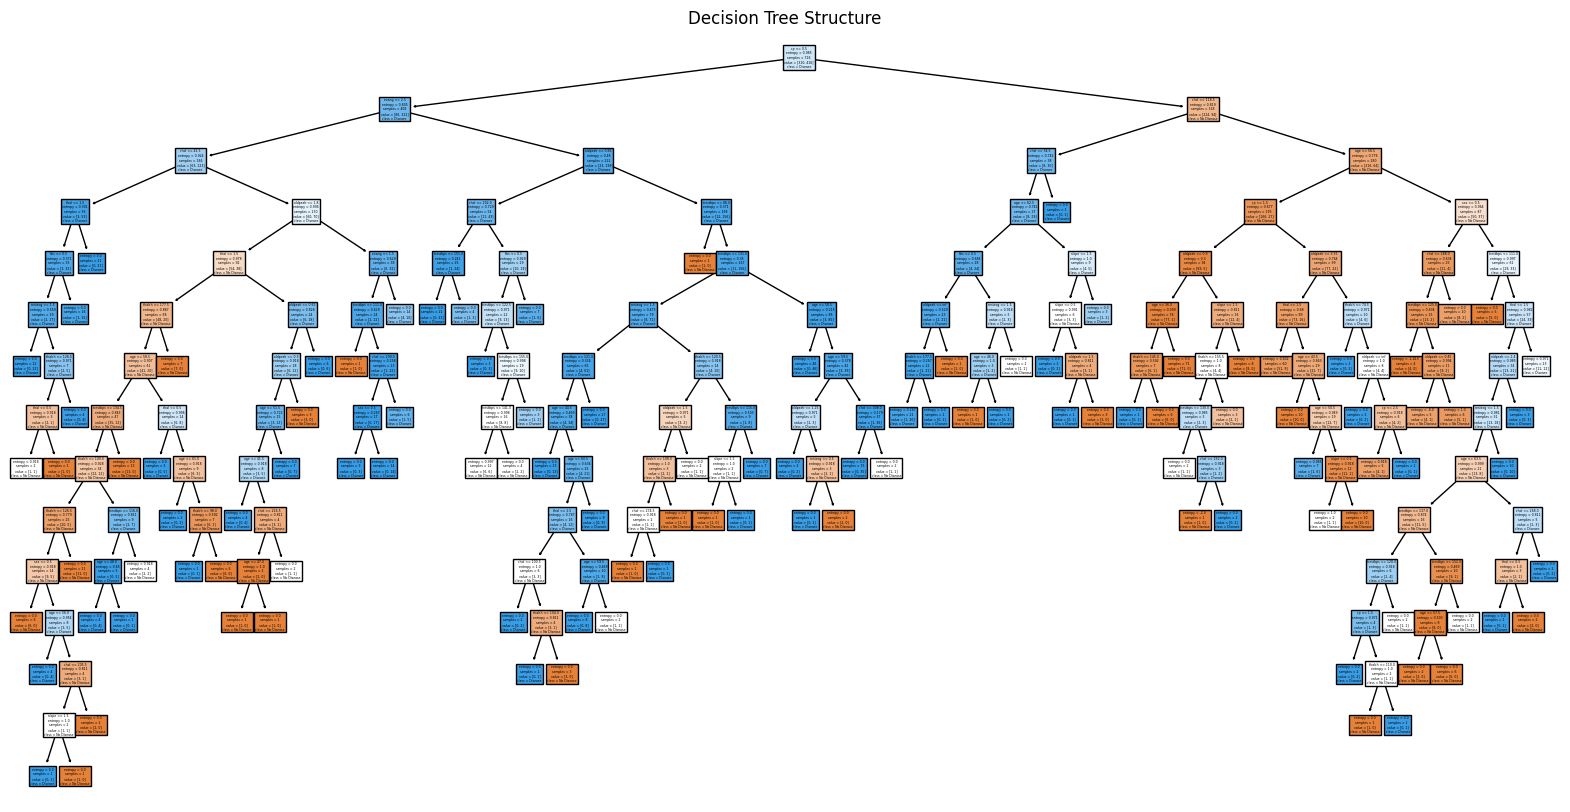

In [21]:
# -------------------------------
#  Step 9: Visualize Decision Tree
# -------------------------------
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(grid.best_estimator_, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Decision Tree Structure")
plt.show()


### Q1. What are some common hyperparameters of decision tree models?

max_dept: Limits the depth of the tree to prevent overfitting.
min_samples_split: Minimum samples needed to split an internal node.
min_samples_leaf: Minimum samples required at a leaf node.criterion`: The function to measure the quality of a split (‘gini’ or ‘entropy’).



### Q2. What is the difference between Label Encoding and One-Hot Encoding?
Label Encoding: Assigns a unique number to each category (e.g., Male=1, Female=0).
One-Hot Encoding: Creates a new column for every category.
Use LabelEncoding for tree models. Use OneHot for linear models (like Logistic Regression).
